In [6]:
import os, sys, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 

In [29]:
folder_path = './../results/'
algorithm = 'DE/best/1/bin'
dim = 10

In [28]:
os.listdir(output_filepath)

['[14_10_51_300_0.01_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.01_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.01_0.5_False_None]log.tsv',
 '[14_10_51_300_0.01_0.5_False_None]mean_error_evolution.jpeg',
 '[14_10_51_300_0.1_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.1_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.1_0.5_False_None]log.tsv',
 '[14_10_51_300_0.1_0.5_False_None]mean_error_evolution.jpeg',
 '[14_10_51_300_0.2_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.2_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.2_0.5_False_None]log.tsv',
 '[14_10_51_300_0.2_0.5_False_None]mean_error_evolution.jpeg',
 '[14_10_51_300_0.3_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.3_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.3_0.5_False_None]log.tsv',
 '[14_10_51_300_0.3_0.5_False_None]mean_error_evolution.jpeg',
 '[14_10_51_300_0.4_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.4_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.4_0.5_False_None]log.tsv',
 '[14_10_51_300_0.4_0.5_False_None]mean

In [223]:
output_filepath = folder_path+algorithm
df_sumup = None
for filename in os.listdir(output_filepath):
    re_result = re.search(regex, filename)
    if re_result is not None:
        dim_file = int(filename.split('_')[1])
        if dim_file == dim:    
            df_temp = pd.read_csv(output_filepath+'/'+filename, sep='\t')
            if df_sumup is None:
                df_sumup = df_temp.copy()
            else:
                df_sumup = pd.concat([df_sumup, df_temp]).copy()            
            run_tag = re.search('(\[.*\])', filename).group()
            
df_sumup['elapsed_time'] = df_sumup['elapsed_time'].apply(lambda x: '{:.02f}'.format(60*int(x.split(':')[0]) + int(x.split(':')[1])+int(x.split(':')[2])/60)) 
df_sumup.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_sumup.reset_index(drop = True, inplace=True)
df_sumup.sort_values(by=['#Fc', 'percFES'], inplace=True)
print ('df_sumup shape: ', df_sumup.shape)

df_sumup shape:  (66, 58)


In [224]:
df_sumup.head()

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
11,DE/best/1/bin,1,10,0.01,1.354013e+08,1.180590e+08,1.008402e+08,6.192052e+07,9.996439e+07,4.499349e+07,...,5.399525e+07,4.118638e+07,1.058987e+08,7.549812e+07,5.871264e+07,3.365695e+07,7.317914e+07,7.032986e+07,1.85,1200
12,DE/best/1/bin,1,10,0.10,1.882817e+06,3.092010e+06,1.675623e+06,2.747928e+06,2.353963e+06,1.178123e+06,...,1.410328e+06,1.537569e+06,2.293733e+06,2.849034e+06,2.942011e+06,1.869454e+06,4.272100e+06,2.525938e+06,27.05,10200
13,DE/best/1/bin,1,10,0.20,2.894122e+05,4.771673e+05,2.741337e+05,5.193689e+05,6.557156e+05,6.130211e+05,...,5.135868e+05,4.076566e+05,4.040253e+05,2.952421e+05,5.660777e+05,3.064208e+05,2.715782e+05,3.691687e+05,56.15,20100
14,DE/best/1/bin,1,10,0.30,4.970483e+04,7.487154e+04,4.562646e+04,1.971253e+05,9.546666e+04,4.032093e+04,...,1.101074e+05,7.705190e+04,1.441529e+05,5.334121e+04,8.607928e+04,9.635821e+04,6.810209e+04,7.596959e+04,80.22,30000
15,DE/best/1/bin,1,10,0.40,8.519582e+03,8.408394e+03,1.376685e+04,1.086876e+04,1.475478e+04,2.622162e+04,...,1.144921e+04,1.397318e+04,1.419655e+04,9.854971e+03,2.594816e+04,2.542122e+04,2.570509e+04,1.861351e+04,102.48,39900


In [228]:
df_maxperc = pd.DataFrame(columns=['Fi - D' + str(dim), 'Best', 'Worst', 'Median', 'Mean', 'Std Dev', 'Success Rate (%)', 'Elapsed Time (min)'])
for index, row in df_sumup[df_sumup['percFES'] == 1].iterrows():
    funcId = 'F' + str(row['#Fc'])
#     best = '{:.2E}'.format(np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).min())
    best = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).min()
    worst = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).max()
    median = np.median(np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]))
    mean = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).mean()
    std = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).std()
    successRate = np.where(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]] < 1e-8)[0].shape[0]/51
    elapsed_time = row['elapsed_time']
    df_maxperc.loc[df_maxperc.shape[0]] = np.array([funcId, best, worst, median, mean, std, successRate, elapsed_time])
df_maxperc.sort_values(['Best'], ascending=True, inplace=True)
df_maxperc['Best']=df_maxperc['Best'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Worst']=df_maxperc['Worst'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Median']=df_maxperc['Median'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Mean']=df_maxperc['Mean'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Std Dev']=df_maxperc['Std Dev'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Success Rate (%)']=df_maxperc['Success Rate (%)'].apply(lambda x: 100*float(x))
df_maxperc.to_csv(output_filepath+'/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'df_maxperc.csv', sep=',', index=None)
df_maxperc

,Fi - D10,Best,Worst,Median,Mean,Std Dev,Success Rate (%),Elapsed Time (min)
1,F2,2.27E-03,6.01E-02,7.01E-03,9.84E-03,9.15E-03,0.0,408.50
2,F6,8.75E-03,1.03E+00,2.22E-02,1.33E-01,3.01E-01,0.0,320.40
5,F14,6.21E-02,2.10E-01,1.45E-01,1.40E-01,3.81E-02,0.0,315.38
3,F7,1.45E-01,7.52E-01,4.94E-01,4.92E-01,1.08E-01,0.0,317.63
0,F1,2.87E-01,4.05E+00,1.56E+00,1.70E+00,9.46E-01,0.0,191.78
4,F9,1.09E+01,3.98E+01,2.87E+01,2.83E+01,5.80E+00,0.0,315.35


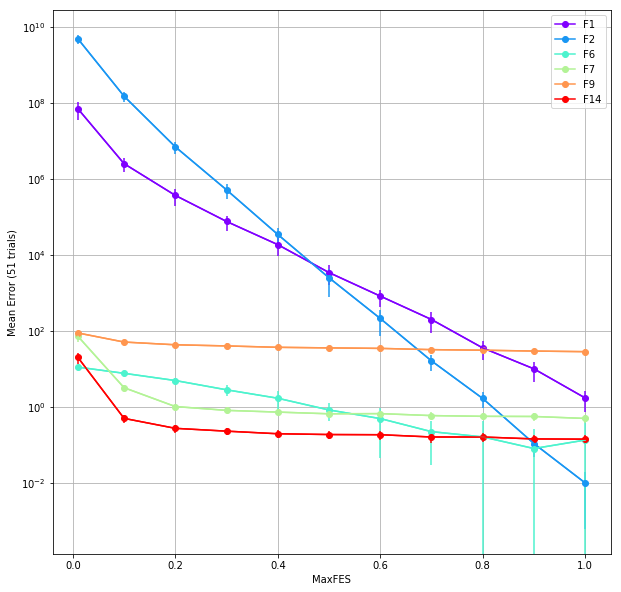

In [203]:
fig, ax = plt.subplots(figsize=(10,10), nrows=1, ncols=1)
color=plt.cm.rainbow(np.linspace(0,1,df_sumup['#Fc'].unique().shape[0]))
for index, funcId in enumerate(df_sumup['#Fc'].unique()):
    df_temp = df_sumup[df_sumup['#Fc'] == funcId].copy()
    arr_percFes = np.array(df_temp['percFES'])
    arr_mean = np.array(df_temp[['run_' + str(x) for x in np.arange(1,51+1, 1)]].mean(axis=1))
    arr_std = np.array(df_temp[['run_' + str(x) for x in np.arange(1,51+1, 1)]].std(axis=1))

    ax.errorbar(x=arr_percFes, y=arr_mean, yerr=arr_std, c=color[index])
    ax.plot(arr_percFes, arr_mean, '-o', color=color[index], label = 'F' + str(funcId))
ax.grid(True)
ax.legend()
ax.set_xlabel('MaxFES')
ax.set_ylabel('Mean Error ({} trials)'.format(51))
plt.yscale('log')
plt.savefig(output_filepath+'/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'mean_maxFES.jpeg', bbox_inches = 'tight')